In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = 2* np.random.rand(10000,2) -1

In [4]:
data

array([[-0.44144944, -0.59617698],
       [-0.3470686 , -0.10317051],
       [ 0.09563595, -0.33497459],
       ...,
       [-0.82534521, -0.84038042],
       [-0.21368132, -0.7474823 ],
       [ 0.11009485,  0.48241886]])

In [5]:
# 输出特定行
data[[0,1]]

array([[-0.44144944, -0.59617698],
       [-0.3470686 , -0.10317051]])

In [6]:
# 输出特定列
# 限定只输出前后5行,suppress输出详细信息（非科学计数法）
np.set_printoptions(edgeitems=5,suppress=True)  
data[:,0]

array([-0.44144944, -0.3470686 ,  0.09563595, -0.90543578, -0.8973078 ,
       ...,  0.49658766,  0.46067329, -0.82534521, -0.21368132,
        0.11009485])

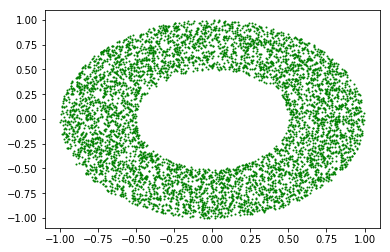

In [7]:
# 画图
x = data[:,0]
y = data[:,1]
idx = x**2 + y**2 <1  # 限定圆
hole = x**2 + y**2 <0.25 # 内部圆
idx = np.logical_and(idx,~hole)  # 与运算 ~非
plt.plot(x[idx],y[idx],'go',markersize=1)
print('',end='')

In [8]:
pic = np.random.uniform(0,255,size=(5,5))
pic[:2]

array([[ 70.0001116 , 116.57618828, 139.20856697,  26.47236667,
         35.58565878],
       [118.8375528 ,  22.64262192,  97.45142169, 135.86394129,
        224.03068122]])

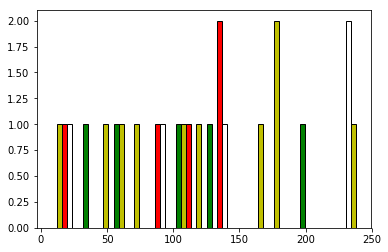

In [9]:
# 直方图绘制
plt.hist(pic,
         bins=10,  #  分20块
         color=('g','y','r','w','y'), # 颜色 绿色
         edgecolor='k' )# 边缘颜色
print('',end='')

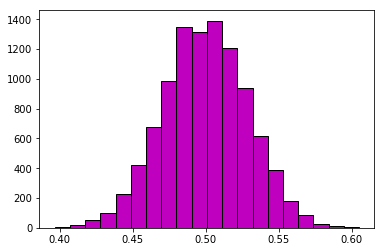

In [10]:
# 验证中心极限定理
N = 10000
times = 100
z = np.zeros(N)
for i in range(times):
    z += np.random.rand(N)
z /= times
plt.hist(z, bins=20, color='m',edgecolor='k') 
print('',end='')

In [11]:
pic = np.random.rand(3,4)
pic

array([[0.84664809, 0.8592499 , 0.3459974 , 0.21891381],
       [0.17793662, 0.81618099, 0.24382278, 0.44907877],
       [0.69236132, 0.64183259, 0.03247855, 0.95993556]])

In [12]:
# 转换为pandas
data = pd.DataFrame(data=pic, columns=list('abcd'))
data[list('ad')]

,a,d
0,0.846648,0.218914
1,0.177937,0.449079
2,0.692361,0.959936


In [13]:
# 保存结果
data.to_csv('data.csv',
            index=False, # 不保存索引
            header = True  # 保存文件头
           )

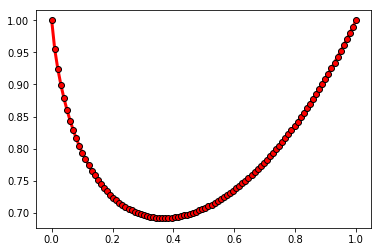

In [14]:
# 函数绘制
# x = np.arange(0, 2, 0.1)
x = np.linspace(0, 1, 100)
y = x**x 
plt.plot(x, y, 'ro-' # 红线
         , lw=3, # 线宽
         mec = 'k' # 点边框 
        )
print('',end='')

Wall time: 65.8 ms


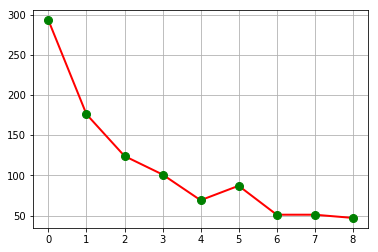

In [15]:
%%time
# Sample1 :本福特定律
def firstd(x):
#     while x>=10:
#         x//=10
#     return x
    x = str(x)
    return int(x[0])  # 更优解法效率提升40倍
n = 1
frequency = [0]*9
for i in range(1,1000):
    n*=i
    m = firstd(n)-1
    frequency[m]+=1
plt.plot(frequency,'r-',lw=2)
plt.plot(frequency,'go',markersize=8)
plt.grid(True)

In [27]:
# 实现softmax损失函数的计算
D = 784
K = 10
N = 128
# socres 为分值矩阵
scores = np.random.randn(N, K)
# 样本标签
y = np.random.randint(K, size=N)
# 指数化分值矩阵
exp_scores = np.exp(scores)
# 样本归一化系数
exp_scores_sum = np.sum(exp_scores, axis=1)
# 样本真实类别的归一化分值
corect_probs = exp_scores[range(N),y]/exp_scores_sum
# 负对数损失函数
corect_logprobs = -np.log(corect_probs)
# 平均损失
data_loss = np.sum(corect_logprobs)/N
print(data_loss)

2.90856992464757


25.0
12.5
6.25
3.125
1.5625
0.78125
0.390625
0.1953125
0.09765625
0.048828125


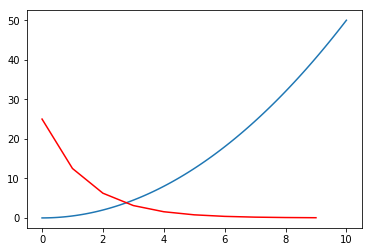

In [43]:
# 简单一元函数的梯度下降算法
alpha = 1
epslon = 0.5
iter_num = 10
x0 = 50
updateline = []
f = lambda x:alpha*x**2/2
df = lambda x:alpha*x
update = lambda x:x-epslon*df(x)
x = x0

for k in range(iter_num):
    x = update(x)
    updateline.append(x)
    print(x)
# 生成画图数据
x = np.linspace(0, 10, 100)
y = f(x)
plt.plot(x,y)
plt.plot(range(iter_num),updateline,'r-')